# ***Introducción***


Dia a dia las personas son vulnerables a diversas enfermedades de diferentes tipos y diferentes rangos de propagacion. En dicho contexto, entender cómo se propaga dichas enfermedades es esencial para tomar decisiones informadas sobre salud pública.

La idea de este proyecyo es el de desarrollar uan solución a la siguiente pregunta

>¿Desde dónde y por cuál(es) individuo(s) se propago un virus hasta llegar a otro(s) individuo(s)?

 Utilizando el lenguaje python, se construirá un algoritmo que permita establecer el camino mas probable por el que se desplazó una enfermedad hasta llegar a otra u otras personas, utilizando la teoría de grafos y el modelo epidemiológico SIR.


# ***Acercamiento al problema***





El problema en cuestión implica entender cómo se propaga un virus en una población dada. Para abordar esto, utilizaremos la teoría de grafos para representar las conexiones entre individuos, cada vértice de nuestro grafo es una persona de nuestra población, las aristas representarán los vínculos personales de dichas personas los cuales estarán previamente establecidos y predeterminados.

Nuestro grafo sera $G=(S,I,R,E)$ donde $S,I,R$ son subcojuntos que pertenecen al conjunto de vértices $S,I,R ∈ V $ y $E$ es el conjunto de aristas. Siguiendo las definiciones, con los subconjuntos de vértices podremos formar **subgrafos** que nos serán útiles para la implementación.

Supongamos que el patógeno a tratar tiene una probabilidad de infección del $ρ=50$%, entonces para determinar el peso de las aristas tendremos que hacer lo siguiente:

*   Se comienza siempre desde el vértice cero, o la persona desde la cual queremos reconstruir nuestro camino de propagación.
*   Si un vértice ($V_1$) tiene $n$ vértices adyacentes, y esos vértices adyacentes a su vez tienen $k_i$ vértices adyacentes, entonces el peso de la arista que conecta ($V_1$) con sus vecinos es:
$$W_n=\frac{(n-1)+k_i}{ρ}$$Donde $W_n$ corresponde al peso de cada vecino de ($V_1$) y $k_i$ son los adyacentes de cada vecino de ($V_1$)
*   Si un vértice no tiene vértices adyacentes el peso corresponde matemáticamente a cero lo que nos comprueba que dicho vértice carece de aristas


# **Módelo matemático SIR**





El modelo SIR es un modelo epidemiológico simple que describe la propagación de una enfermedad infecciosa en una población. Este modelo divide la población en tres grupos:


* $S(t)$: Número de individuos susceptibles a la enfermedad en el tiempo $t$.
* $I(t)$: Número de individuos infectados en el tiempo $t$.
* $R(t)$: Número de individuos recuperados (o inmunizados) en el tiempo $t$.


Las ecuaciones diferenciales que rigen este modelo son:

\begin{align*}
  \frac{dS}{dt} &= -\beta \cdot \frac{S \cdot I}{N}, \\
  \frac{dI}{dt} &= \beta \cdot \frac{S \cdot I}{N} - \gamma \cdot I, \\
  \frac{dR}{dt} &= \gamma \cdot I.
\end{align*}

Donde:


*   $\beta$: Tasa de contacto efectiva (transmisión de la enfermedad).
*   $\gamma$: Tasa de recuperación.
* $N = S + I + R$: Tamaño total de la población constante.


Estas ecuaciones describen cómo cambian las poblaciones de susceptibles, infectados y recuperados en función del tiempo. El modelo SIR asume tasas constantes de transmisión y recuperación, y una población completamente mezclada.


# **Proceso de modelado**



1. **Creación del Grafo:**
   - Representaremos la población como vértices en el grafo.
   - Las aristas reflejarán las conexiones entre individuos, ponderadas por la probabilidad de transmisión.

2. **División en Subgrafos:**
   - Tendremos subgrafos para los individuos susceptibles, infectados y recuperados.
   - Estos subgrafos evolucionarán con el tiempo según el modelo SIR.

3. **Algoritmo de PrimSP:**
   - Utilizaremos el algoritmo de PrimSP para identificar las conexiones más probables(En este caso haremos uso de una librería motivo de que al ser un modelo que si se aplica a casos reales debe tratar con poblaciones grandes, una implementación primitiva no permitiría resultados optimos y certeros ref: [Networkx](https://networkx.org/documentation/stable/reference/algorithms/shortest_paths.html).
   - Este algoritmo nos ayudará a discernir las rutas de infección más significativas en la red.
   
4. **Semilla y generalización del problema:**
   - Debemos entender que en la vida real existen muchos más factores influyentes en la propagación y comportamiento de una virus, en nuestro caso como debiamos obtener resultados que representaran esa variación (pseudoaletoria en nuestro caso) utilizamos **semillas** en la implementación del modelo SIR que nos permite obtener la misma replicación y output para la misma configuración de resultados  
5. **Grafo de referencia modelado:**
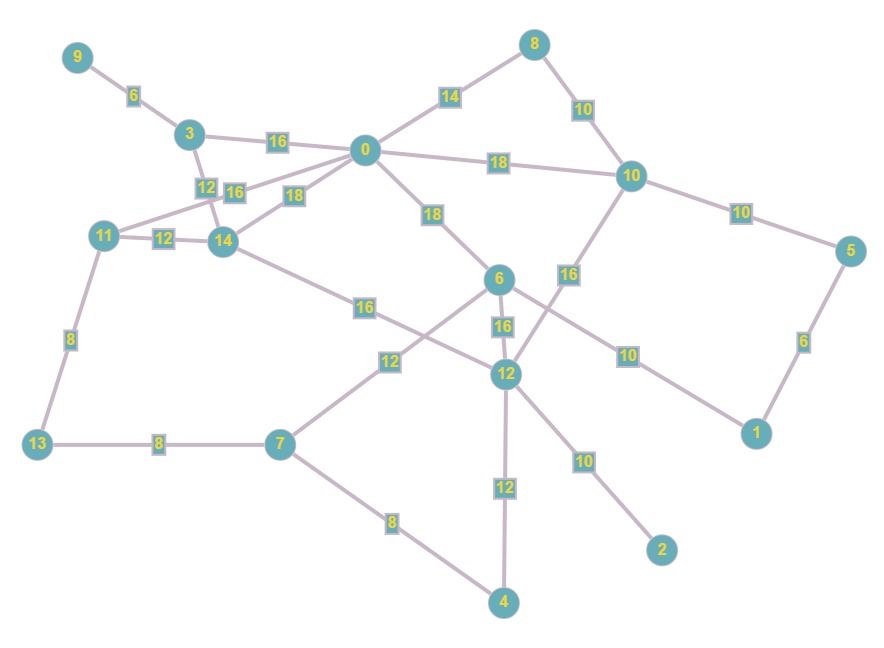

# **Implementación del modelo**

***Como aclaración***, la librería usada para representar gráficamente los grafos no tiene en cuenta la posición exacta en el plano de los vértices, así que la forma no será la misma cada vez que se ejecute aún si los parámetros son iguales, sin embargo, el grafo sí es el mismo, son isomorfos en todos los casos

In [1]:
#Librerias necesarias
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
# Elegir vértices para calcular su camino de propagación (Camino más corto)
start_vertex = 2
end_vertex = 9

In [3]:
#Función para calcular el peso de las aristas
def calcular_peso(n, ki, rho):
    return ((n - 1) + ki) / rho

In [4]:
# Crear el grafo especificado
G = nx.Graph()

edges = [
    (9, 3), (3, 14), (3, 0), (0, 8), (0, 10),
    (8, 10), (0, 14), (14, 11), (11, 13), (13, 7),
    (10, 5), (7, 6), (14, 12), (0, 6), (0, 11),
    (10, 12), (12, 6), (5, 1), (6, 1), (12, 4),
    (12, 2), (4, 7)
]

# Agregar nodos y aristas al grafo
G.add_edges_from(edges)

In [5]:
#Implemrntación Prim con ayuda de la librería
def prim_shortest_path(graph, start, end):
    # Usar NetworkX para encontrar el camino más corto
    shortest_path = nx.shortest_path(graph, source=start, target=end, weight='weight')

    # Crear el conjunto de aristas en el árbol
    tree_edges = {(shortest_path[i], shortest_path[i + 1], graph[shortest_path[i]][shortest_path[i + 1]]['weight']) for i in range(len(shortest_path) - 1)}

    return shortest_path, tree_edges

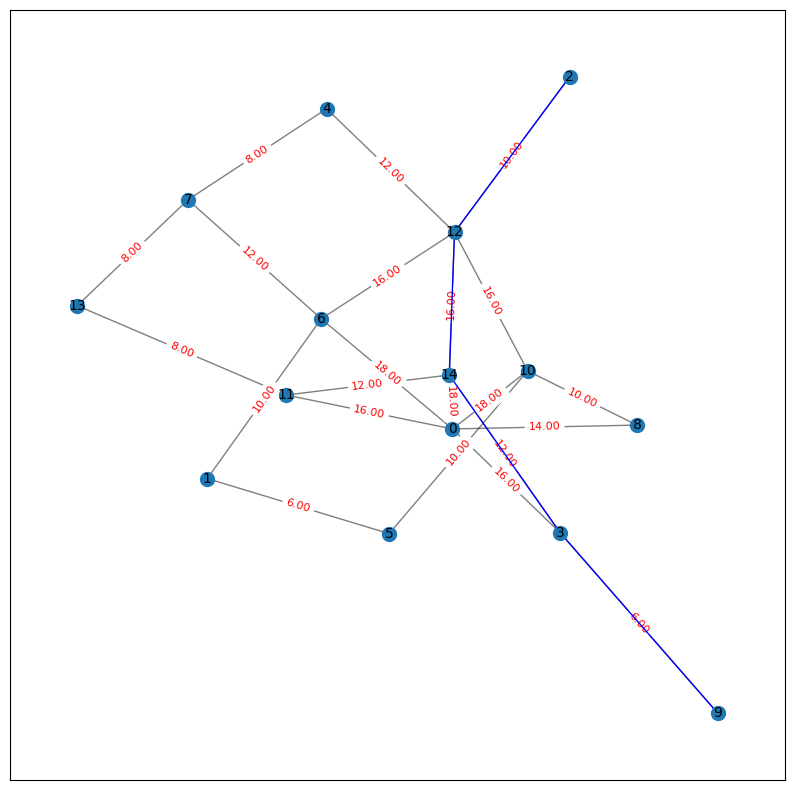

In [6]:

# Calcular los grados de los nodos adyacentes
for node in G.nodes:
    neighbors = list(G.neighbors(node))
    degree_sum = sum(G.degree(neighbor) for neighbor in neighbors)

    # Asignar pesos según la fórmula especificada
    prob_transmision = 0.5
    for neighbor in neighbors:
        ki = G.degree(neighbor)
        peso = calcular_peso(len(neighbors), ki, prob_transmision)
        G[node][neighbor]['weight'] = peso


# Aplicar el algoritmo Prim
shortest_path, tree_edges = prim_shortest_path(G, start_vertex, end_vertex)

# Visualización del grafo con el camino más corto
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=100)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): f"{G[i][j]['weight']:.2f}" for i, j in G.edges()}, font_color='red', font_size=8)
nx.draw_networkx_labels(G, pos, font_size=10)

# Resaltar el camino más corto en azul
nx.draw_networkx_edges(G, pos, edgelist=[(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)], edge_color='blue', width=1.0)

plt.show()


In [7]:
# Parámetros del modelo SIR
beta = 0.5  # Tasa de transmisión
gamma = 0.1  # Tasa de recuperación
tiempo_recuperacion = 10

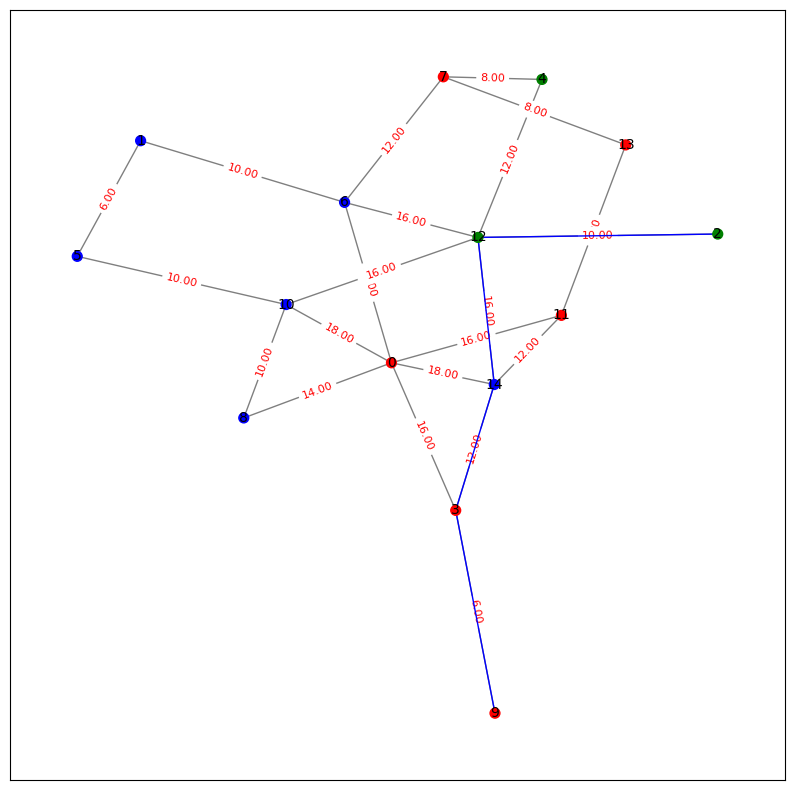

Camino más corto ponderado: [2, 12, 14, 3, 9]


In [8]:
#Juntar las dos implementaciones

def sir_dinamica_temporal(G, beta, gamma, tiempo_recuperacion,seed=None):

   # Establecer la semilla para la reproducibilidad
    random.seed(seed)

    # Inicializar el estado de los nodos
    for node in G.nodes:
        G.nodes[node]['estado'] = 'S'

    # Establecer el nodo inicial como infectado
    G.nodes[1]['estado'] = 'I'

    # Evolucionar la dinámica temporal
    for _ in range(tiempo_recuperacion):
        nuevos_infectados = set()

        for node in G.nodes:
            if G.nodes[node]['estado'] == 'I':
                # Propagar la infección a los vecinos susceptibles
                for neighbor in G.neighbors(node):
                    if G.nodes[neighbor]['estado'] == 'S' and random.random() < beta:
                        nuevos_infectados.add(neighbor)

        # Actualizar los estados de los nodos
        for node in nuevos_infectados:
            G.nodes[node]['estado'] = 'I'

        # Recuperación determinista
        for node in G.nodes:
            if G.nodes[node]['estado'] == 'I' and random.random() < gamma:
                G.nodes[node]['estado'] = 'R'

def visualizar_grafo(G, pos, colors):
    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(G, pos, node_size=50, node_color=colors)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): f"{G[i][j]['weight']:.2f}" for i, j in G.edges()}, font_color='red', font_size=8)
    nx.draw_networkx_labels(G, pos, font_size=10)

    # Resaltar el camino más corto en azul
    edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='blue', width=1.0)
    plt.show()


# Asignar pesos considerando prob_transmision
prob_transmision = 0.5
for edge in G.edges:
    G[edge[0]][edge[1]]['weight'] = calcular_peso(G.degree(edge[0]), G.degree(edge[1]), prob_transmision)


# Aplicar la dinámica temporal SIR al grafo con semilla para reproducibilidad
seed = 1  # Puedes ajustar la semilla según tus necesidades
sir_dinamica_temporal(G, beta, gamma, tiempo_recuperacion, seed)


# Visualizar el estado final de los nodos y el camino más corto
colors = {'S': 'green', 'I': 'red', 'R': 'blue'}
visualizar_grafo(G, nx.spring_layout(G), [colors[G.nodes[node]['estado']] for node in G.nodes])

# Encontrar el camino más corto ponderado
shortest_path, tree_edges = prim_shortest_path(G, start_vertex, end_vertex)
print("Camino más corto ponderado:", shortest_path)

# **Análisis de resultados**

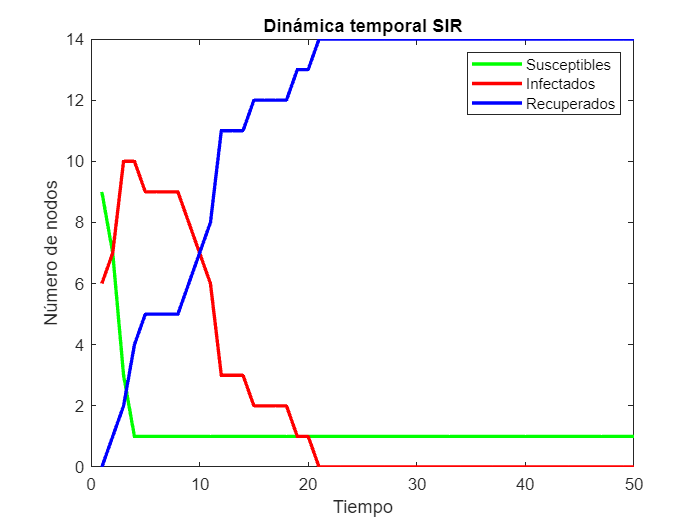

Como podemos observar nuestro análisis de resultados para la implementación del modelo SIR es correcta, sólo cuando el tiempo se hace mayor a 20, en este caso el número de iteraciones(pueden ser años, días o meses según corresponda nuestro caso) los recuperados tienden a el total de la población y la población suceptible tiende al nodo cero o nodo inicial, esto considerando que nuestro virus tenga ciclos y pueda reinfectar a la población recuperada. Respecto a los grafos obtenidos, el primer grafo permite observar el camino más probable para la propagación de de un nodo inicial a un nodo final, y el segundo grafo obtenido muestra ese mismo camino más los vértices con los respectivos colores que indican el estado de la persona según el modelo.